# Project on German credit database

**Project's issue**: 

The main idea is to challenge the traditional methods of classification and prediction of default with the
machine-learning methods already used in other financial intermediation institutions, especially in
startups. The comparison of the methods will be based on the usual performance's metrics. Logistic regression outcomes will be used as benchmark 
    
This project consists in building the best possible score function on a classic Machine-learning
database: the German Credit Data database.
This database has the distinction of being very small: it represents 1000 loans, 20 variables such as
marital status, age, number of credits to date, the amount requested. One of the advantages of this
database is that it contains the same type of information used in default risk assessment in most retail
banking establishments. However, the defect observation rate is very high (around 30%).

the Databasae can be find out using the following link :  http://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)


**Main results**

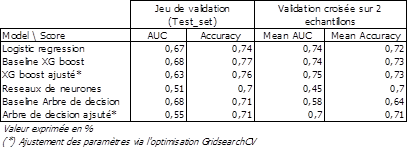

# Packages

In [170]:
import pandas as pd 
import numpy as np 
from collections import defaultdict
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,classification_report,auc
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import tree
import tensorflow as tf 
import tensorflow.keras as keras 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import initializers
from tensorflow.keras.utils import plot_model

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,GridSearchCV
from sklearn.feature_selection import SelectKBest,chi2,RFE,f_classif
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,classification_report,auc
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree
import seaborn as sns
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier

# Load dataset 

In [44]:
names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']
file = r'D:\sklearn\german.data'
df = pd.read_csv(file,names = names, delimiter = ' ')
df.head()

,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [50]:
df.set_index(np.arange(1,1001,step =1),inplace = True)

In [52]:
df.describe()

,duration,creditamount,installmentrate,residencesince,age,existingcredits,peopleliable,classification
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [53]:
print("Data set shape", df.shape)

Data set shape (1000, 21)


# Data cleaning 

In [54]:
# classification variable transformation -> 1 = 'bad' credit; 0 = 'good' credit
df.classification.replace([1,2], [0,1], inplace=True)
# Nombre de 'good' credits  and 'bad credits
df.classification.value_counts()

0    700
1    300
Name: classification, dtype: int64

In [55]:
#numerical labels
numvars = ['creditamount', 'duration', 'installmentrate', 'residencesince', 'age', 
           'existingcredits', 'peopleliable', 'classification']

#categorical labels 
catvars = ['existingchecking', 'credithistory', 'purpose', 'savings', 'employmentsince',
           'statussex', 'otherdebtors', 'property', 'otherinstallmentplans', 'housing', 'job', 
           'telephone', 'foreignworker'] 

In [56]:
#standardization of num labels
numdata_std = pd.DataFrame(StandardScaler().fit_transform(df[numvars].drop(['classification'], axis=1)))

In [57]:
#categorical codification
d = defaultdict(LabelEncoder)
lecatdf = df[catvars].apply(lambda x: d[x.name].fit_transform(x))

# print transformations
for x in range(len(catvars)):
    print(catvars[x],": ", df[catvars[x]].unique())
    print(catvars[x],": ", lecatdf[catvars[x]].unique())

existingchecking :  ['A11' 'A12' 'A14' 'A13']
existingchecking :  [0 1 3 2]
credithistory :  ['A34' 'A32' 'A33' 'A30' 'A31']
credithistory :  [4 2 3 0 1]
purpose :  ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
purpose :  [4 7 3 0 1 9 5 6 2 8]
savings :  ['A65' 'A61' 'A63' 'A64' 'A62']
savings :  [4 0 2 3 1]
employmentsince :  ['A75' 'A73' 'A74' 'A71' 'A72']
employmentsince :  [4 2 3 0 1]
statussex :  ['A93' 'A92' 'A91' 'A94']
statussex :  [2 1 0 3]
otherdebtors :  ['A101' 'A103' 'A102']
otherdebtors :  [0 2 1]
property :  ['A121' 'A122' 'A124' 'A123']
property :  [0 1 3 2]
otherinstallmentplans :  ['A143' 'A141' 'A142']
otherinstallmentplans :  [2 0 1]
housing :  ['A152' 'A153' 'A151']
housing :  [1 2 0]
job :  ['A173' 'A172' 'A174' 'A171']
job :  [2 1 3 0]
telephone :  ['A192' 'A191']
telephone :  [1 0]
foreignworker :  ['A201' 'A202']
foreignworker :  [0 1]


In [58]:
#One hot encoding, num_var turned into binary variable
dummyvars = pd.get_dummies(df[catvars])

In [59]:
#clean databse 
data_clean = pd.concat([df[numvars], dummyvars], axis = 1)
print("German credit clean dataset", data_clean.head())
print("Clean dataset set shape", data_clean.shape )

German credit clean dataset    creditamount  duration  installmentrate  residencesince  age  \
1          1169         6                4               4   67   
2          5951        48                2               2   22   
3          2096        12                2               3   49   
4          7882        42                2               4   45   
5          4870        24                3               4   53   

   existingcredits  peopleliable  classification  existingchecking_A11  \
1                2             1               0                     1   
2                1             1               1                     0   
3                1             2               0                     0   
4                1             2               0                     1   
5                2             2               1                     1   

   existingchecking_A12  ...  housing_A152  housing_A153  job_A171  job_A172  \
1                     0  ...             1  

## First step features selections : statistical's test
Features selection based on Pearson correlation , Chi2 and Anova Fvalue

In [61]:
#Features Default selection
feature_name = data_clean.columns.drop('classification').tolist()
x = data_clean.drop('classification',axis=1)
y = data_clean.classification

In [62]:
#Preprocessing using Pearson Correlation
cor = data_clean.corr()
#Correlation with output variable
cor_target = abs(cor["classification"])
print(cor_target.describe())


count    62.000000
mean      0.090822
std       0.133207
min       0.000751
25%       0.030075
50%       0.070521
75%       0.106791
max       1.000000
Name: classification, dtype: float64


In [63]:
#Number of highly correlated features with the target value
num_feats = cor_target[cor_target>0.1]
print("Number of highly correlated features with the target value ", len(num_feats))

Number of highly correlated features with the target value  17


In [64]:
num_feats = 15

In [65]:
def cor_selector(X, y,num_feats):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

def chi_selector(X, y,num_feats):
    X_norm = MinMaxScaler().fit_transform(X)
    chi_selector = SelectKBest(chi2, k=num_feats)
    chi_selector.fit(X_norm, y)
    chi_support = chi_selector.get_support()
    chi_feature = X.loc[:,chi_support].columns.tolist()
    return chi_support, chi_feature

def fvalue_selector(x, y,num_feats):
    fvalue_selector = SelectKBest(f_classif, k=num_feats)
    fvalue_selector.fit_transform(x, y)
    fvalue_support= fvalue_selector.get_support()
    fvalue_feature = x.loc[:,fvalue_support].columns.tolist()
    return fvalue_support, fvalue_feature

In [66]:
x

,creditamount,duration,installmentrate,residencesince,age,existingcredits,peopleliable,existingchecking_A11,existingchecking_A12,existingchecking_A13,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
1,1169,6,4,4,67,2,1,1,0,0,...,1,0,0,0,1,0,0,1,1,0
2,5951,48,2,2,22,1,1,0,1,0,...,1,0,0,0,1,0,1,0,1,0
3,2096,12,2,3,49,1,2,0,0,0,...,1,0,0,1,0,0,1,0,1,0
4,7882,42,2,4,45,1,2,1,0,0,...,0,1,0,0,1,0,1,0,1,0
5,4870,24,3,4,53,2,2,1,0,0,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1736,12,3,4,31,1,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
997,3857,30,4,4,40,1,1,1,0,0,...,1,0,0,0,0,1,0,1,1,0
998,804,12,4,4,38,1,1,0,0,0,...,1,0,0,0,1,0,1,0,1,0
999,1845,45,4,4,23,1,1,1,0,0,...,0,1,0,0,1,0,0,1,1,0


In [67]:
cor_support, cor_feature = cor_selector(x, y,num_feats)
chi_support, chi_feature = chi_selector(x, y,num_feats)
fvalue_support,fvalue_feature =  fvalue_selector(x, y,num_feats)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support,'Anova Fvalue' :fvalue_support })
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)

In [69]:
feature_selection_df.head(50)

,Feature,Pearson,Chi-2,Anova Fvalue,Total
1,savings_A65,True,True,True,3
2,savings_A61,True,True,True,3
3,purpose_A43,True,True,True,3
4,property_A124,True,True,True,3
5,property_A121,True,True,True,3
6,existingchecking_A14,True,True,True,3
7,existingchecking_A12,True,True,True,3
8,existingchecking_A11,True,True,True,3
9,credithistory_A34,True,True,True,3
10,credithistory_A31,True,True,True,3


In [95]:
relevant_features = feature_selection_df[feature_selection_df.Total>1].Feature
print("Number of relevant features : ", len(relevant_features))
relevant_features

Number of relevant features :  15


1                    savings_A65
2                    savings_A61
3                    purpose_A43
4                  property_A124
5                  property_A121
6           existingchecking_A14
7           existingchecking_A12
8           existingchecking_A11
9              credithistory_A34
10             credithistory_A31
11             credithistory_A30
12    otherinstallmentplans_A143
13                  housing_A152
14                      duration
15                  creditamount
Name: Feature, dtype: object

In [75]:
#Analysis of relevant features correlation between themselves
plt.figure(figsize=(15,15))
cor = x[relevant_features].corr()
columns = np.full((cor.shape[0],), True, dtype=bool)
for i in range(cor.shape[0]):
    for j in range(i+1, cor.shape[0]):
        if abs(cor.iloc[i,j]) >= 0.6:
            if columns[j]:
                columns[j] = False
relevant_features = x[relevant_features].columns[columns]
print("Number of relevant features : ", len(relevant_features))
relevant_features=relevant_features.tolist()
relevant_features

Number of relevant features :  14


['savings_A65',
 'savings_A61',
 'purpose_A43',
 'property_A124',
 'property_A121',
 'existingchecking_A14',
 'existingchecking_A12',
 'existingchecking_A11',
 'credithistory_A34',
 'credithistory_A31',
 'credithistory_A30',
 'otherinstallmentplans_A143',
 'housing_A152',
 'duration']

<Figure size 1080x1080 with 0 Axes>

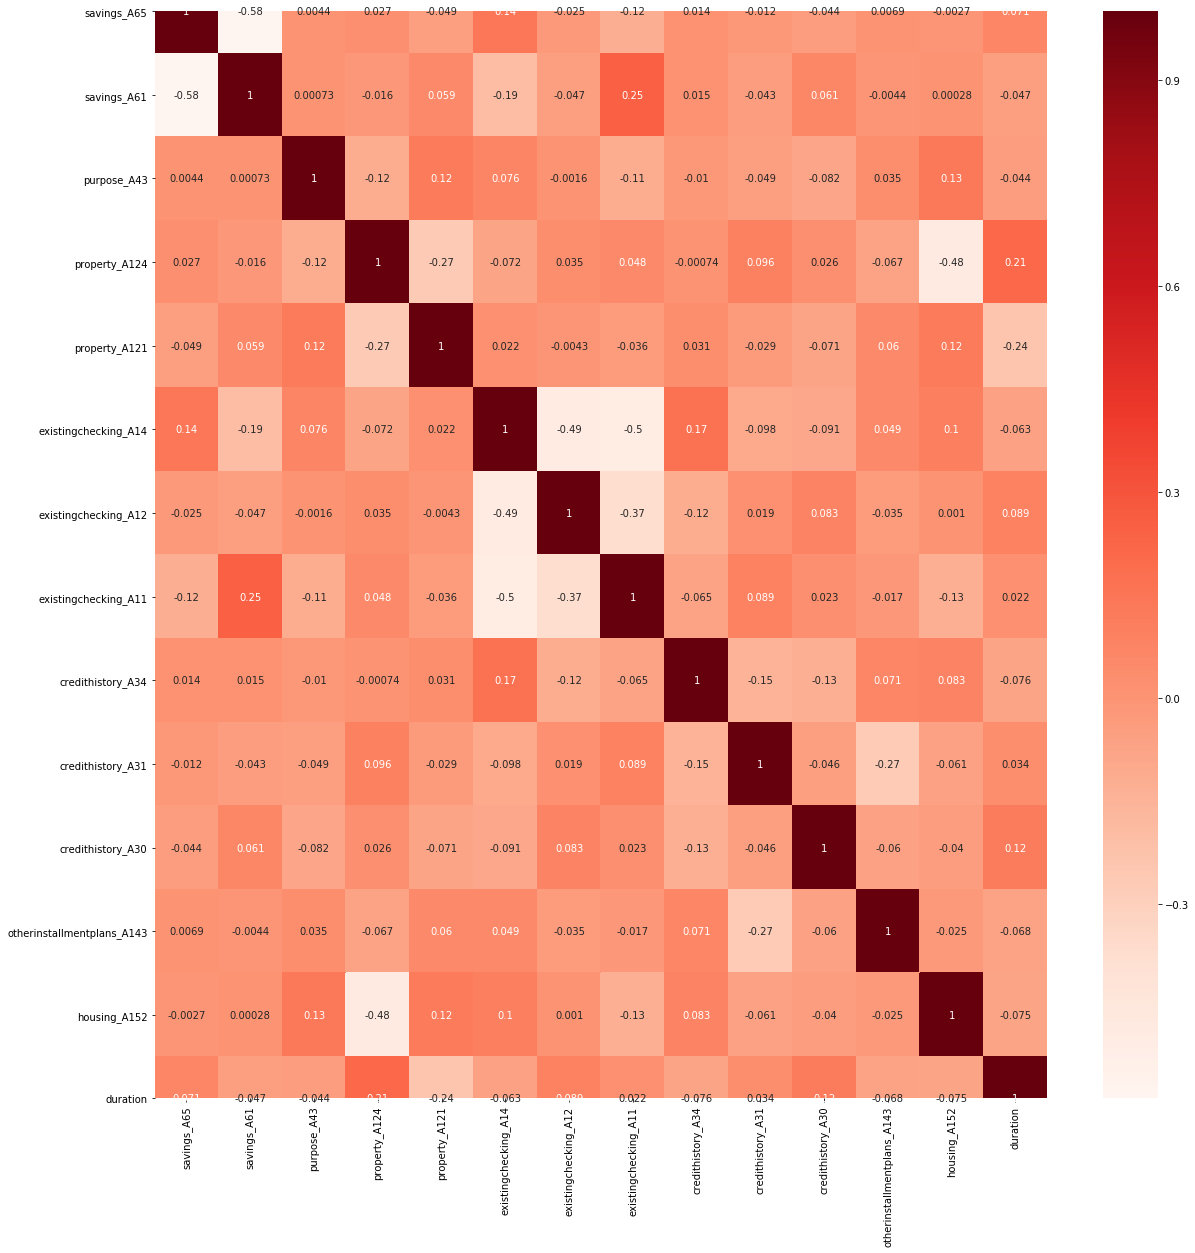

In [78]:
cor = x[relevant_features].corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Second step features selection : Wrapper Method
Recursive features elimination using the Gradient Boosting classifier, Logistic regression and desicion tree

In [96]:
def rfe_selector(X, y,num_feats,model):
    X_norm = MinMaxScaler().fit_transform(x)
    rfe_selector = RFE(estimator=model, n_features_to_select=num_feats, step=5, verbose=2)
    rfe_selector.fit(X_norm, y)
    rfe_support = rfe_selector.get_support()
    rfe_feature = x.loc[:,rfe_support].columns.tolist()
    return rfe_support, rfe_feature

In [107]:
x = x[relevant_features]

1       0
2       1
3       0
4       0
5       1
       ..
996     0
997     0
998     0
999     1
1000    0
Name: classification, Length: 1000, dtype: int64

In [ ]:
# put all selection together
rfe_selection_df = pd.DataFrame({'Feature':relevant_features, 'Gradient Boosting':xgb_support, 
                                 'Decision tree':tree_support,'Logistic regression' :log_support})
# count the selected times for each feature
rfe_selection_df['Total'] = np.sum(rfe_selection_df, axis=1)
# display the top 100
rfe_selection_df = rfe_selection_df.sort_values(['Total','Feature'] , ascending=False)
rfe_selection_df.index = range(1, len(rfe_selection_df)+1)
rfe_selection_df

# Modelisation Part 

## Function

In [263]:
def modelfit(model,X_train,Y_train,X_test,Y_test,features,performCV=True,roc=False, printFeatureImportance=False):
    
    #Fitting the model on the data_set
    model.fit(X_train[features],Y_train)
        
    #Predict training and on the test set:
    y_pred1 = model.predict(X_train[features])
    predprob = model.predict_proba(X_train[features])[:,1]
    y_pred2 = model.predict(X_test[features])
    
    # Create and print confusion matrix    
    cfm = confusion_matrix(Y_train,y_pred1)
    cfm_test = confusion_matrix(Y_test,y_pred2)
    print("\nModel Confusion matrix on  train set ")
    print(cfm)
    
    print("\nModel Confusion matrix on  test set ")
    print(cfm_test)
    
    #Print model report:
    print("\nModel Report ")
    print("Accuracy on train set : %.4g" % metrics.accuracy_score(Y_train.values, y_pred1))
    print("Accuracy on test set : %.4g" % metrics.accuracy_score(Y_test.values, y_pred2))
    
    #Perform cross-validation: evaluate using 10-fold cross validation 
    kfold = StratifiedKFold(n_splits=10, shuffle=True)
    if performCV:
        print(" cross-validation: evaluate using 10-fold cross validation on the train set ")
        evaluation(model,X_train[features],Y_train,kfold)
    if roc: 
        compute_roc(y_test = Y_test, y_pred_test= y_pred2 ,y_train =Y_train, y_pred_train = y_pred1, plot=True)
          
    #Print Feature Importance:
    if printFeatureImportance:
        feature_importance(model,features,threshold = 0.02, selection=False) 

In [83]:
#Fonction d'evaluation 
def evaluation(model,X,Y,kfold):
    # Cross Validation to test and anticipate overfitting problem
    scores1 = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    scores2 = cross_val_score(model, X, Y, cv=kfold, scoring='precision')
    scores3 = cross_val_score(model, X, Y, cv=kfold, scoring='recall')
    # The mean score and standard deviation of the score estimate
    print("Cross Validation Accuracy: %0.5f (+/- %0.2f)" % (scores1.mean(), scores1.std()))
    print("Cross Validation Precision: %0.5f (+/- %0.2f)" % (scores2.mean(), scores2.std()))
    print("Cross Validation Recall: %0.5f (+/- %0.2f)" % (scores3.mean(), scores3.std()))
    return  

In [86]:
def compute_roc(y_test, y_pred_test, y_train, y_pred_train, plot=True):
    fpr_train = dict()
    tpr_train = dict()
    auc_score_train = dict()   
    fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
    auc_score_train = auc(fpr_train, tpr_train)
    
    fpr_test = dict()
    tpr_test = dict()
    auc_score_test = dict()
    fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)
    auc_score_test = auc(fpr_test, tpr_test)
    
    if plot:
        plt.figure(figsize=(7, 6))
        
        plt.plot(fpr_train, tpr_train, color='blue',
                 label='ROC curve Train data set (area = %0.2f)' % auc_score_train)
        
        plt.plot(fpr_test, tpr_test, color='orange',
                 label='ROC curve Test data set (area = %0.2f)' % auc_score_test)
        
        plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
        
        plt.legend(loc="upper right")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title("ROC Curve")
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.show()
    return 

In [150]:
def feature_importance(model,features,threshold,selection=False) : 
    feature_importances = pd.DataFrame(model.feature_importances_  )
    feature_importances = feature_importances.T
    feature_importances.columns = [features]
    
    sns.set(rc={'figure.figsize':(13,12)})
    fig = sns.barplot(data=feature_importances, orient='h', order=feature_importances.mean().sort_values(ascending=False).index)
    fig.set(title = 'Feature importance', xlabel = 'features', ylabel = 'features_importance' )
    
    if selection: #Selection of features with min threshold% of feature importance
        n_features = feature_importances[feature_importances.loc[:,] > threshold].dropna(axis='columns')
        n_features = n_features.columns.get_level_values(0)    
        print("Selected features")
        print(n_features)
        
    return fig

## Local train and test dataset

In [85]:
relevant_features = ['savings_A65',
 'savings_A61',
 'purpose_A43',
 'property_A124',
 'property_A121',
 'existingchecking_A14',
 'existingchecking_A12',
 'existingchecking_A11',
 'credithistory_A34',
 'credithistory_A31',
 'credithistory_A30',
 'otherinstallmentplans_A143',
 'housing_A152',
 'duration']

In [10]:
#Train set validation set 
x= data_clean.drop('classification', axis=1)
y = data_clean['classification']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)


x_train (750, 61)
x_test (250, 61)
y_train (750,)
y_test (250,)


0    524
1    226
Name: classification, dtype: int64

# Classification algorithms

## ML DecisionTreeClassifier

In [87]:
#Decison tree baseline model
model = tree.DecisionTreeClassifier()
#Fitting Decison tree baseline model
modelfit(model,x_train, y_train,relevant_features,performCV=False)
print("Accuracy on test set :{:.3f} ".format(model.score(x_test, y_test)))


Model Confusion matrix
[[516   8]
 [ 36 190]]

Model Report
Accuracy : 0.9413
Accuracy on test set :0.668 


In [88]:
#Tunning Decision tree model  With Gridsearch
print('Decision tree with Classifier')
params={'max_depth': np.arange(2, 8),'criterion':['gini','entropy']}
tree_estimator = tree.DecisionTreeClassifier()

kfold = 10 

grid_tree = GridSearchCV(tree_estimator, params, cv=kfold, scoring="accuracy",
                         n_jobs=1,
                         verbose=False)

grid_tree.fit(x_train, y_train)
best_est = grid_tree.best_estimator_
print(best_est)
print(grid_tree.best_score_)


# summarize results
print("Best: %f using %s" % (grid_tree.best_score_, grid_tree.best_params_))
means = grid_tree.cv_results_['mean_test_score']
stds = grid_tree.cv_results_['std_test_score']
params = grid_tree.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Decision tree with Classifier
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
0.732
Best: 0.732000 using {'criterion': 'gini', 'max_depth': 5}
0.712000 (0.022163) with: {'criterion': 'gini', 'max_depth': 2}
0.726667 (0.029395) with: {'criterion': 'gini', 'max_depth': 3}
0.726667 (0.052593) with: {'criterion': 'gini', 'max_depth': 4}
0.732000 (0.031102) with: {'criterion': 'gini', 'max_depth': 5}
0.716000 (0.046617) with: {'criterion': 'gini', 'max_depth': 6}
0.712000 (0.049273) with: {'criterion': 'gini', 'max_depth': 7}
0.706667 (0.021421) with: {'criterion': 'entropy', 'max_depth': 2}
0.717333 (0.031647) with: {'criterion': 'entropy', '

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


 **the best Hyperparameters for our Decision tree model using gridsearch Cv  is {'criterion': 'gini', 'max_depth': 5}**


Model Confusion matrix
[[472  52]
 [117 109]]

Model Report
Accuracy : 0.7747
Cross Validation Accuracy: 0.72126 (+/- 0.04)
Cross Validation Precision: 0.50008 (+/- 0.13)
Cross Validation Recall: 0.35889 (+/- 0.14)


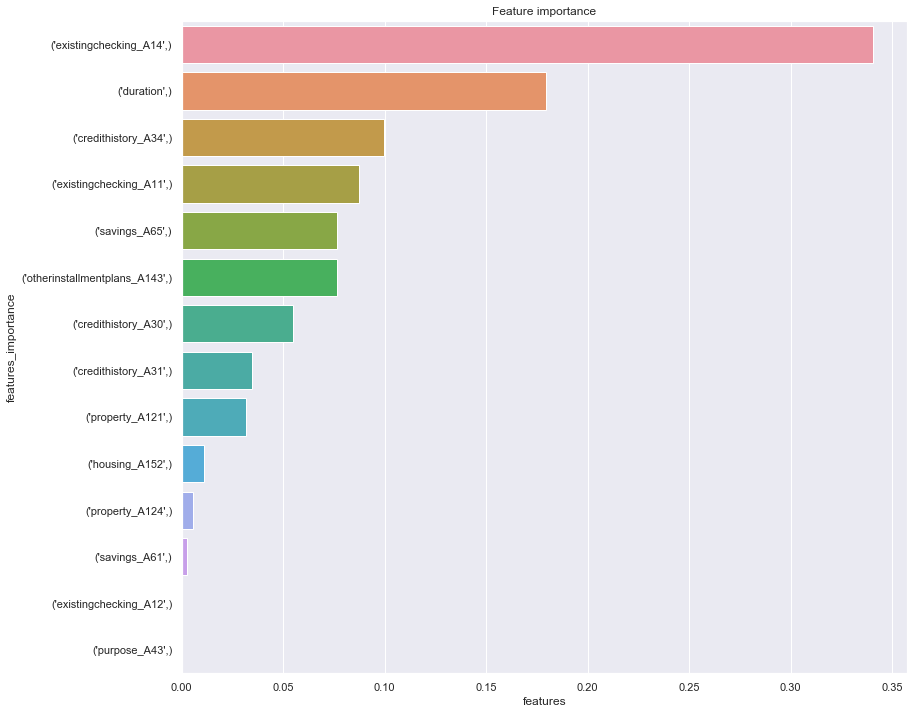

In [91]:
model = tree.DecisionTreeClassifier(max_depth = 5,criterion='gini')
modelfit(model,x_train, y_train,relevant_features,printFeatureImportance=True)

Selected features
Index(['savings_A65', 'existingchecking_A14', 'existingchecking_A11',
       'credithistory_A34', 'credithistory_A30', 'otherinstallmentplans_A143',
       'duration'],
      dtype='object')


(<matplotlib.axes._subplots.AxesSubplot at 0x1cea1c2ae48>,
 Index(['savings_A65', 'existingchecking_A14', 'existingchecking_A11',
        'credithistory_A34', 'credithistory_A30', 'otherinstallmentplans_A143',
        'duration'],
       dtype='object'))

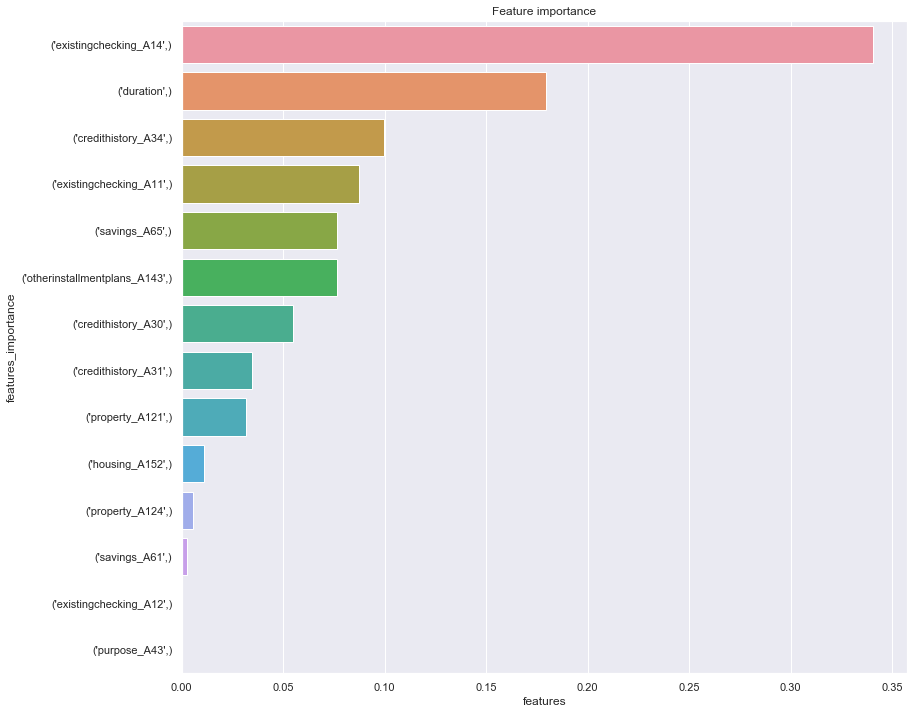

In [93]:
feature_importance(model,relevant_features,0.05,selection=True)

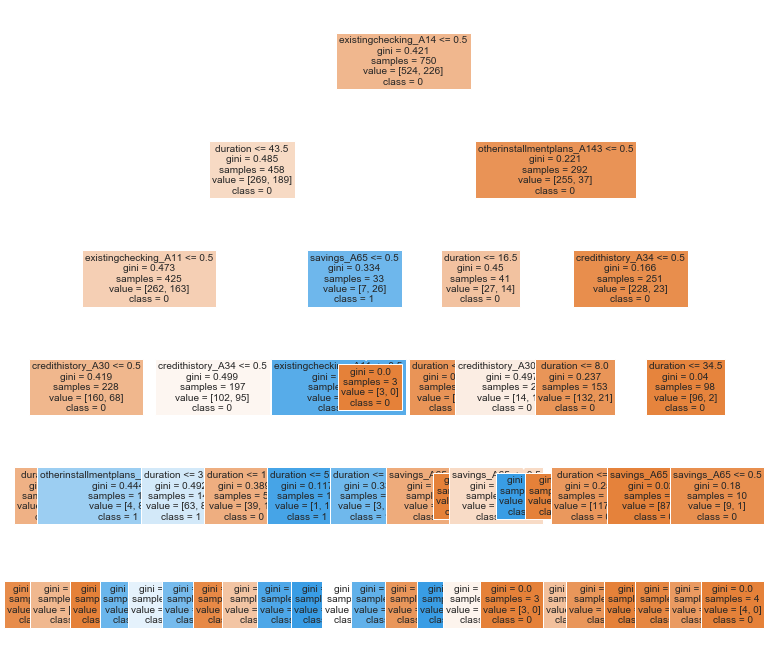

In [134]:
model = tree.DecisionTreeClassifier(max_depth = 5,criterion='gini')
tree_features = ['savings_A65', 'existingchecking_A14', 'existingchecking_A11',
                 'credithistory_A34', 'credithistory_A30', 'otherinstallmentplans_A143','duration']
cn=['0', '1']
clf = model.fit(x_train[tree_features], y_train)
plot_tree(clf, 
          feature_names =tree_features,
          class_names = cn,
          filled=True,fontsize=10)
plt.show()


Model Confusion matrix
[[456  68]
 [109 117]]

Model Report
Accuracy : 0.764
Cross Validation Accuracy: 0.72492 (+/- 0.05)
Cross Validation Precision: 0.56015 (+/- 0.11)
Cross Validation Recall: 0.43043 (+/- 0.12)

Model Confusion matrix
[[165  11]
 [ 45  29]]

Model Report
Accuracy : 0.776
Cross Validation Accuracy: 0.65667 (+/- 0.06)
Cross Validation Precision: 0.52750 (+/- 0.21)
Cross Validation Recall: 0.37679 (+/- 0.18)


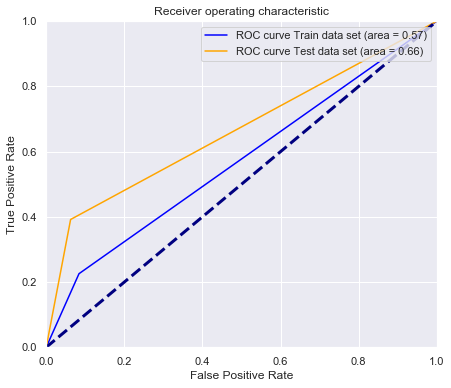

In [143]:
modelfit(model,x_train,y_train,tree_features, printFeatureImportance=False)
modelfit(model,x_test,y_test,tree_features, printFeatureImportance=False)
y_pred = model.predict(x_train[tree_features])
y_pred2 = model.predict(x_test[tree_features])
compute_roc(y_test = y_test, y_pred_test= y_pred2 ,y_train =y_train, y_pred_train = y_pred, plot=True)

## ML Gradient Boosting classifier

In [227]:
#Train set validation set 
x= data_clean.drop('classification', axis=1)
y = data_clean['classification']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)


In [169]:
GradientBoostingClassifier(random_state=10)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


Model Confusion matrix
[[510  14]
 [ 73 153]]

Model Report
Accuracy : 0.884
Cross Validation Accuracy: 0.73980 (+/- 0.04)
Cross Validation Precision: 0.57817 (+/- 0.10)
Cross Validation Recall: 0.44684 (+/- 0.07)


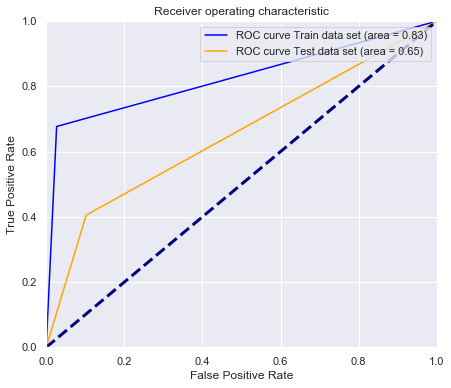

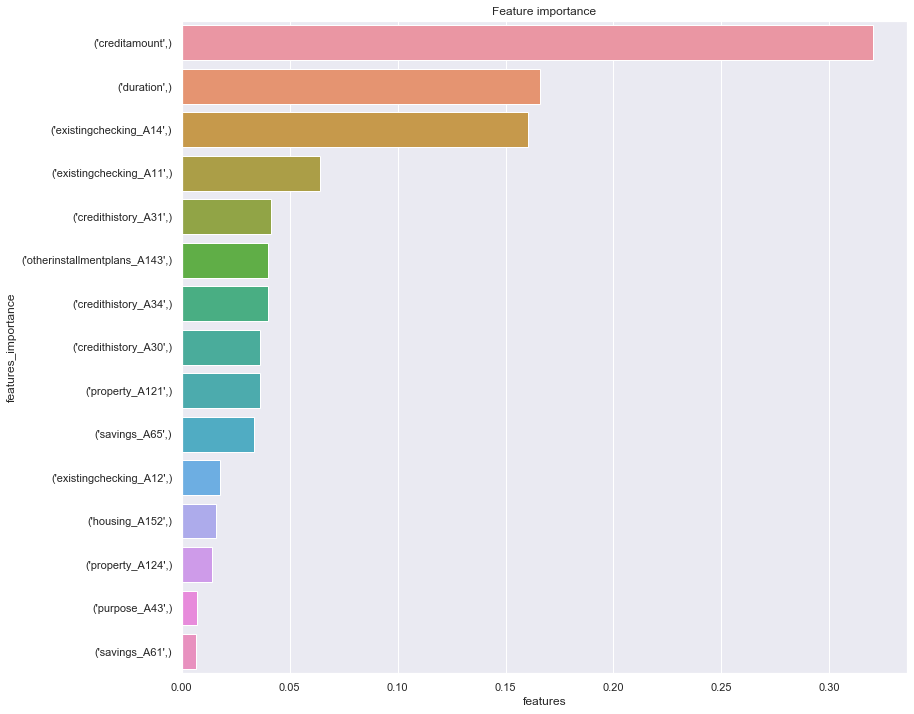

In [151]:
#Baseline Gradient boosting model 
base_gbm = GradientBoostingClassifier(random_state=10)
modelfit(base_gbm,x_train, y_train,relevant_features,roc=True,printFeatureImportance=True)

# **Tunning parameters with Gridsearch**
** Baseline approch**
   *Fix learning rate and number of estimators for tuning tree-based parameters
    min_samples_split = 500 : This should be ~0.5-1% of total values.
    min_samples_leaf = 50 :  for preventing overfitting and again a small value.
    max_depth = 8 : Should be choosen (5-8) based on the number of observations and predictors.
    max_features = ‘sqrt’ : Its a general thumb-rule to start with square root.
    subsample = 0.8 : commonly used used start value

**we will choose all the features 

In [152]:
print('tuning n_estimators')
params1 = {'n_estimators':range(30,81,10)}

estimator = GradientBoostingClassifier(learning_rate=0.1, 
                                       min_samples_split=500,
                                       min_samples_leaf=50,
                                       max_depth=8,
                                       max_features='sqrt',
                                       subsample=0.8,
                                       random_state=10)

grid_xgb1 = GridSearchCV(estimator,
                  params1,
                  cv=10,
                  scoring='accuracy',
                  n_jobs=1,
                  verbose=False)

grid_result=grid_xgb1.fit(x_train[relevant_features], y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

tuning n_estimators
Best: 0.737333 using {'n_estimators': 80}
0.698667 (0.016680) with: {'n_estimators': 30}
0.705333 (0.020526) with: {'n_estimators': 40}
0.720000 (0.029402) with: {'n_estimators': 50}
0.729333 (0.025267) with: {'n_estimators': 60}
0.734667 (0.032918) with: {'n_estimators': 70}
0.737333 (0.030318) with: {'n_estimators': 80}


In [153]:
print('tuning max_depth and min_sample_split')
params2 =  {'max_depth':range(5,16,2), 'min_samples_split':range(400,1001,200)}

estimator = GradientBoostingClassifier(learning_rate=0.1,
                                       n_estimators = 80,
                                       max_features='sqrt',
                                       subsample=0.8,
                                       random_state=10)

grid_xgb2 = GridSearchCV(estimator,
                  params2,
                  cv=10,
                  scoring='accuracy',
                  n_jobs=-1,
                  verbose=True)

grid_result=grid_xgb2.fit(x_train[relevant_features], y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

tuning max_depth and min_sample_split
Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.9s


Best: 0.754667 using {'max_depth': 5, 'min_samples_split': 400}
0.754667 (0.025520) with: {'max_depth': 5, 'min_samples_split': 400}
0.698667 (0.003578) with: {'max_depth': 5, 'min_samples_split': 600}
0.698667 (0.003578) with: {'max_depth': 5, 'min_samples_split': 800}
0.698667 (0.003578) with: {'max_depth': 5, 'min_samples_split': 1000}
0.754667 (0.025520) with: {'max_depth': 7, 'min_samples_split': 400}
0.698667 (0.003578) with: {'max_depth': 7, 'min_samples_split': 600}
0.698667 (0.003578) with: {'max_depth': 7, 'min_samples_split': 800}
0.698667 (0.003578) with: {'max_depth': 7, 'min_samples_split': 1000}
0.754667 (0.025520) with: {'max_depth': 9, 'min_samples_split': 400}
0.698667 (0.003578) with: {'max_depth': 9, 'min_samples_split': 600}
0.698667 (0.003578) with: {'max_depth': 9, 'min_samples_split': 800}
0.698667 (0.003578) with: {'max_depth': 9, 'min_samples_split': 1000}
0.754667 (0.025520) with: {'max_depth': 11, 'min_samples_split': 400}
0.698667 (0.003578) with: {'max_dep

[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   11.6s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [154]:
print('tuning num_sample_split and min_sample_split')
params3 =  {'min_samples_leaf':range(40,70,10), 'min_samples_split':range(400,1001,200)}
estimator = GradientBoostingClassifier(learning_rate=0.1,
                                       n_estimators = 80,
                                       max_depth=5,
                                       max_features='sqrt',
                                       subsample=0.8,
                                       random_state=10)
grid_xgb3 = GridSearchCV(estimator,
                  params3,
                  cv=10,
                  scoring='accuracy',
                  n_jobs=-1,
                  verbose=True)
grid_result=grid_xgb3.fit(x_train[relevant_features], y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

tuning num_sample_split and min_sample_split
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s


Best: 0.740000 using {'min_samples_leaf': 40, 'min_samples_split': 400}
0.740000 (0.027664) with: {'min_samples_leaf': 40, 'min_samples_split': 400}
0.698667 (0.003578) with: {'min_samples_leaf': 40, 'min_samples_split': 600}
0.698667 (0.003578) with: {'min_samples_leaf': 40, 'min_samples_split': 800}
0.698667 (0.003578) with: {'min_samples_leaf': 40, 'min_samples_split': 1000}
0.734667 (0.022025) with: {'min_samples_leaf': 50, 'min_samples_split': 400}
0.698667 (0.003578) with: {'min_samples_leaf': 50, 'min_samples_split': 600}
0.698667 (0.003578) with: {'min_samples_leaf': 50, 'min_samples_split': 800}
0.698667 (0.003578) with: {'min_samples_leaf': 50, 'min_samples_split': 1000}
0.737333 (0.026399) with: {'min_samples_leaf': 60, 'min_samples_split': 400}
0.698667 (0.003578) with: {'min_samples_leaf': 60, 'min_samples_split': 600}
0.698667 (0.003578) with: {'min_samples_leaf': 60, 'min_samples_split': 800}
0.698667 (0.003578) with: {'min_samples_leaf': 60, 'min_samples_split': 1000}


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.7s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [157]:
print('tuning max_features')
params4 =  {'max_features':range(2,len(relevant_features),1)}

estimator = GradientBoostingClassifier(learning_rate=0.1,
                                       n_estimators = 40,
                                       max_depth=5,                                        
                                       min_samples_split=400, 
                                       min_samples_leaf=40, 
                                       subsample=0.8,
                                       random_state=10)
grid_xgb4 = GridSearchCV(estimator,
                  params4,
                  cv=10,
                  scoring='accuracy',
                  n_jobs=1,
                  verbose=True)
grid_result=grid_xgb4.fit(x_train[relevant_features], y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds , params):
    print("%f (%f) with: %r" % (mean, stdev, param))

tuning max_features
Fitting 10 folds for each of 13 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best: 0.736000 using {'max_features': 11}
0.718667 (0.030990) with: {'max_features': 2}
0.720000 (0.025072) with: {'max_features': 3}
0.721333 (0.030335) with: {'max_features': 4}
0.726667 (0.029972) with: {'max_features': 5}
0.729333 (0.032203) with: {'max_features': 6}
0.728000 (0.028263) with: {'max_features': 7}
0.721333 (0.024186) with: {'max_features': 8}
0.733333 (0.028903) with: {'max_features': 9}
0.728000 (0.021730) with: {'max_features': 10}
0.736000 (0.029225) with: {'max_features': 11}
0.734667 (0.027930) with: {'max_features': 12}
0.732000 (0.030405) with: {'max_features': 13}
0.733333 (0.029508) with: {'max_features': 14}


[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    4.4s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [265]:
xgb_tunned = GradientBoostingClassifier(learning_rate=0.1,
                                        n_estimators = 40,
                                        max_depth=5,                         
                                        min_samples_split=400,
                                        min_samples_leaf=40,
                                        subsample=0.8,
                                        max_features= 11,
                                        random_state=10)


Model Confusion matrix on  train set 
[[493  31]
 [147  79]]

Model Confusion matrix on  test set 
[[158  18]
 [ 44  30]]

Model Report 
Accuracy on train set : 0.7627
Accuracy on test set : 0.752
 cross-validation: evaluate using 10-fold cross validation on the train set 
Cross Validation Accuracy: 0.73345 (+/- 0.02)
Cross Validation Precision: 0.65809 (+/- 0.13)
Cross Validation Recall: 0.28458 (+/- 0.12)


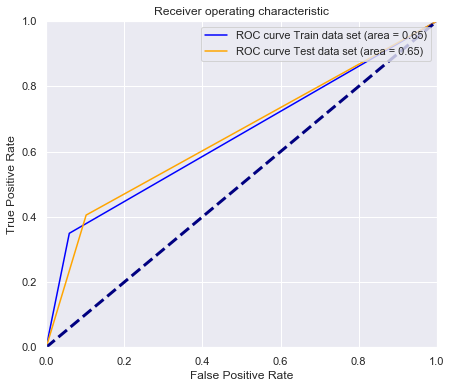

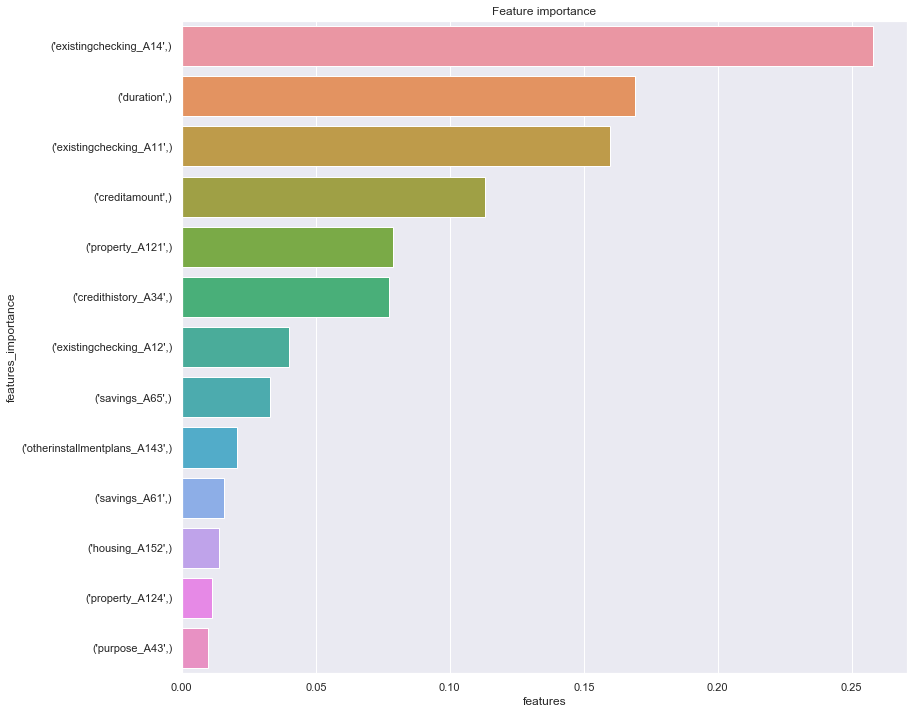

In [266]:
#Fit Cross validation and prediction on the train and the test set
modelfit(xgb_tunned,x_train, y_train, x_test,y_test,relevant_features,performCV=True,roc=True,printFeatureImportance=True)

## MLP MODEL AND LOGISTIC REGRESSION 

In [75]:
#Baseline mlp model 
def mlp_model(init,learning_rate):   
    
    # Model initialisation and layers specification
    model = tf.keras.Sequential()
    model.add(Dense(61,input_dim=61,kernel_initializer=init, activation = 'relu'))
    model.add(Dense(1,kernel_initializer=init, activation='sigmoid'))
    
    # Initialisation of the optimizer
    adam = keras.optimizers.Adam(learning_rate=learning_rate)
    
    # Compile model 
    model.compile(loss=binary_crossentropy, optimizer=adam, metrics=['accuracy']) 
    
    return model


# fit, train and cross validate Logisitc regression with training and test data 
def logreg(X_train, y_train,X_test, y_test):
    print("LogisticRegression")
    model = LogisticRegression().fit(X_train, y_train)
    print(model,'\n')
    
    # Predict target variables y for test data
    y_pred = model.predict(X_test)
    
    print (classification_report(y_test,y_pred) )
    
    # Create and print confusion matrix 
    print("confusion matrix")
    cfm = confusion_matrix(y_test,y_pred)
    print(cfm)
    
    print ("Logistic model Accuracy: %.6f" %accuracy_score(y_test,y_pred) )
    
    # Create and print confusion matrix
    print("ROC curve")
    compute_roc(y_test, y_pred, plot=True)
    
    # Get Cross Validation and Confusion matrix on the test dataset
    evaluation(model, x_test, y_test)
    return 

# Tunning Hyperparameters with Gridsearch

In [14]:
print('MLP with grid search')
# Model creation with keras wrapper
estimator = KerasClassifier(build_fn=mlp_model,verbose=0)

# grid search epochs, batch size, learning_rate, initialiazer
batches = [100]
lr = [ 0.01, 0.001]
init = ['normal', 'uniform','glorot_uniform']
epochs = [10, 15]
param_grid = dict(epochs=epochs, learning_rate=lr, batch_size = batches, init = init)
grid = GridSearchCV(estimator, param_grid=param_grid,
                    return_train_score=False,
                    scoring='roc_auc',
                    verbose=False)

grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

MLP with grid search
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Best: 0.689294 using {'batch_size': 100, 'epochs': 15, 'init': 'glorot_uniform', 'learning_rate': 0.01}
0.526605 (0.050341) with: {'batch_size': 100, 'epochs': 10, 'init': 'normal', 'learning_rate': 0.01}
0.534730 (0.059014) with: {'batch_size': 100, 'epochs': 10, 'init': 'normal', 'learning_rate': 0.001}
0.515765 (0.054898) with: {'batch_size': 100, 'epochs': 10, 'init': 'uniform', 'learning_rate': 0.01}
0.549321 (0.047027) with: {'batch_size': 100, 'epochs': 10, 'init': 'uniform', 'learning_rate': 0.001}
0.557604 (0.015115) with: {'batch_size': 100, 'epochs': 10, 'init': 'glorot_uniform', 'learning_rate': 0.01}
0.573587 (0.065466) with: {'batch_size': 100, 'epochs': 10, 'init': 'glorot_uniform', 'learning_rate': 0.001}
0.641694 (0.081947) with: {'batch_size': 100, 'epochs': 15, 'init': 'normal', 'learning_rate': 0.01}
0.618380 (0.030491) with: {'batch_size': 100, 'epo

# Model implementation

LogisticRegression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

              precision    recall  f1-score   support

           0       0.57      0.49      0.53        74
           1       0.80      0.85      0.82       176

    accuracy                           0.74       250
   macro avg       0.68      0.67      0.67       250
weighted avg       0.73      0.74      0.73       250

confusion matrix
[[ 36  38]
 [ 27 149]]
Logistic model Accuracy: 0.740000
ROC curve


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


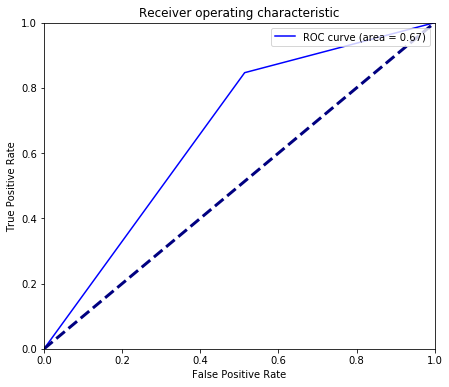

Cross Validation Accuracy: 0.72 (+/- 0.02)
Cross Validation Precision: 0.80 (+/- 0.01)
Cross Validation Recall: 0.80 (+/- 0.01)
Cross Validation roc_auc: 0.74 (+/- 0.05)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [69]:
# Logistic Regression
logreg(x_train, y_train,x_test,y_test)

ROC curve


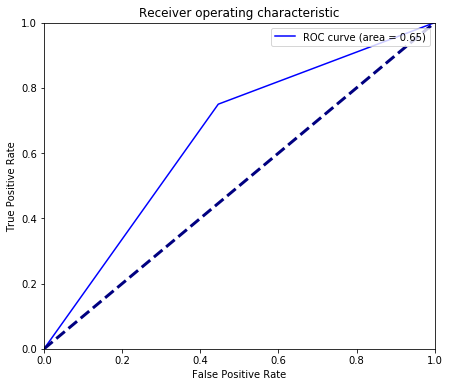

Decision tree model Accuracy: 0.692000
confusion matrix
[[ 41  33]
 [ 44 132]]
Cross Validation Accuracy: 0.64 (+/- 0.00)
Cross Validation Precision: 0.75 (+/- 0.01)
Cross Validation Recall: 0.80 (+/- 0.03)
Cross Validation roc_auc: 0.58 (+/- 0.02)


In [72]:
#Decison tree baseline model
model = tree.DecisionTreeClassifier()
#Fitting Decison tree baseline model
model.fit(x_train,y_train)
#Predict target variables y for test data
y_pred = model.predict(x_test) 
#Create and print confusion matrix
print("ROC curve")
compute_roc(y_test, y_pred, plot=True)
cfm = confusion_matrix(y_test,y_pred)
print ("Decision tree model Accuracy: %.6f" %accuracy_score(y_test,y_pred))
print("confusion matrix")
print(cfm)
evaluation(model,x_test,y_test)

ROC curve
Decison tree model Accuracy: 0.708000


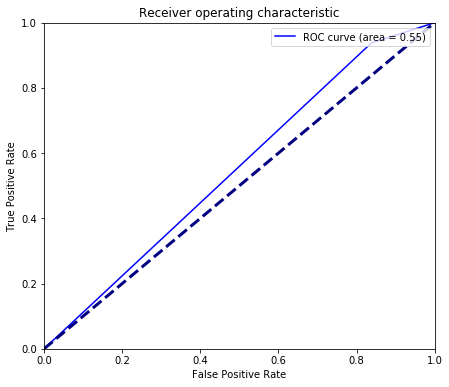

Decision tree model Accuracy: 0.708000
confusion matrix
[[ 12  62]
 [ 11 165]]
Cross Validation Accuracy: 0.70 (+/- 0.00)
Cross Validation Precision: 0.78 (+/- 0.07)
Cross Validation Recall: 0.84 (+/- 0.14)
Cross Validation roc_auc: 0.71 (+/- 0.01)


In [73]:
model = tree.DecisionTreeClassifier(max_depth = 3)
#Fitting Decison tree baseline model
model.fit(x_train,y_train)
# Predict target variables y for test data
y_pred = model.predict(x_test) 
# Create and print confusion matrix
print("ROC curve")
print ("Decison tree model Accuracy: %.6f" %accuracy_score(y_test,y_pred) )
compute_roc(y_test, y_pred, plot=True)
cfm = confusion_matrix(y_test,y_pred)
print ("Decision tree model Accuracy: %.6f" %accuracy_score(y_test,y_pred))
print("confusion matrix")
print(cfm)
evaluation(model,x_test,y_test)

Scorer: make_scorer(roc_auc_score, needs_threshold=True)
Best_score: 0.68929
Train on 750 samples, validate on 250 samples
Epoch 1/15
750/750 - 2s - loss: 67.5693 - acc: 0.5733 - val_loss: 68.5183 - val_acc: 0.2960
Epoch 2/15
750/750 - 0s - loss: 62.6627 - acc: 0.5973 - val_loss: 59.5580 - val_acc: 0.7040
Epoch 3/15
750/750 - 0s - loss: 45.8705 - acc: 0.4573 - val_loss: 21.0413 - val_acc: 0.7040
Epoch 4/15
750/750 - 0s - loss: 41.6792 - acc: 0.6987 - val_loss: 10.7031 - val_acc: 0.3360
Epoch 5/15
750/750 - 0s - loss: 16.9400 - acc: 0.5427 - val_loss: 8.4058 - val_acc: 0.7040
Epoch 6/15
750/750 - 0s - loss: 6.8666 - acc: 0.5853 - val_loss: 1.0573 - val_acc: 0.6840
Epoch 7/15
750/750 - 0s - loss: 3.0467 - acc: 0.6813 - val_loss: 2.3629 - val_acc: 0.5720
Epoch 8/15
750/750 - 0s - loss: 4.3095 - acc: 0.6773 - val_loss: 7.5982 - val_acc: 0.3600
Epoch 9/15
750/750 - 0s - loss: 3.1011 - acc: 0.6373 - val_loss: 0.6821 - val_acc: 0.7440
Epoch 10/15
750/750 - 0s - loss: 4.7796 - acc: 0.6173 - va

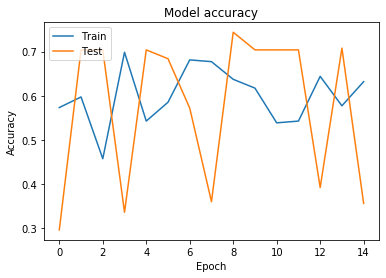

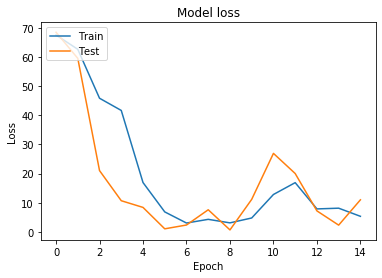

Score on the test set: 0.35600
Cross validation of Gridsearch best estimator


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Cross Validation Accuracy: 0.55 (+/- 0.19)
Cross Validation Precision: 0.17 (+/- 0.17)
Cross Validation Recall: 0.00 (+/- 0.00)
Cross Validation roc_auc: 0.54 (+/- 0.05)


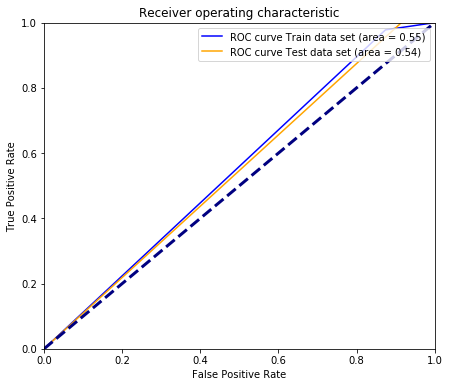

In [60]:
#MLP implementation 
best_pipe = grid_result.best_estimator_
print('Scorer:' , grid_result.scorer_)
print('Best_score: %.5f' % grid_result.best_score_)

# Fitting the best pipe model 
history=best_pipe.fit(x_train, y_train, verbose =2 , validation_data=(x_test, y_test))

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#print(y_pred)
score = best_pipe.score(x_test, y_test)
print('Score on the test set: %.5f' %  score)
print('Cross validation of Gridsearch best estimator')
evaluation(best_pipe,x_test,y_test)

y_pred = best_pipe.predict(x_train)
y_pred2 = best_pipe.predict(x_test)

compute_roc(y_test = y_test, y_pred_test= y_pred2 ,y_train =y_train, y_pred_train = y_pred, plot=True)


In [ ]:
{'batch_size': 100, 'epochs': 15, 'init': 'glorot_uniform', 'learning_rate': 0.01}

Train on 750 samples, validate on 250 samples
Epoch 1/15
750/750 - 3s - loss: 8.1388 - acc: 0.5813 - val_loss: 2.4564 - val_acc: 0.2960
Epoch 2/15
750/750 - 0s - loss: 2.1301 - acc: 0.5333 - val_loss: 1.2090 - val_acc: 0.7040
Epoch 3/15
750/750 - 0s - loss: 1.0068 - acc: 0.5373 - val_loss: 1.1693 - val_acc: 0.7040
Epoch 4/15
750/750 - 0s - loss: 0.8953 - acc: 0.6267 - val_loss: 0.7477 - val_acc: 0.4440
Epoch 5/15
750/750 - 0s - loss: 0.7044 - acc: 0.6693 - val_loss: 0.6701 - val_acc: 0.7040
Epoch 6/15
750/750 - 0s - loss: 0.6587 - acc: 0.6853 - val_loss: 0.6477 - val_acc: 0.7040
Epoch 7/15
750/750 - 0s - loss: 0.6423 - acc: 0.6987 - val_loss: 0.6385 - val_acc: 0.7040
Epoch 8/15
750/750 - 0s - loss: 0.6321 - acc: 0.6987 - val_loss: 0.6315 - val_acc: 0.7040
Epoch 9/15
750/750 - 0s - loss: 0.6385 - acc: 0.6880 - val_loss: 0.6295 - val_acc: 0.7040
Epoch 10/15
750/750 - 0s - loss: 0.6251 - acc: 0.6987 - val_loss: 0.6192 - val_acc: 0.7240
Epoch 11/15
750/750 - 0s - loss: 0.6169 - acc: 0.7000

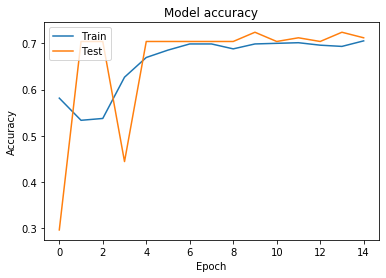

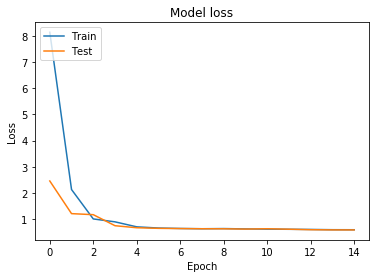

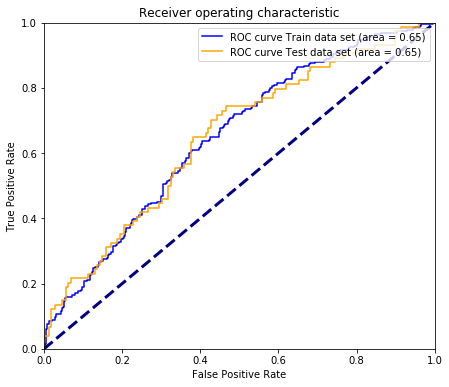

In [77]:
model = mlp_model(init = 'uniform',learning_rate=0.01)

# Fitting the best pipe model 
history= model.fit(x_train, y_train, batch_size=100,epochs= 15,verbose =2,validation_data=(x_test, y_test))

plot_model(model,to_file='model.png')

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Predict on test set and on train set

y_pred = model.predict(x_train)
y_pred2 = model.predict(x_test)

#print('Score on the train set: %.5f' %  model.score(x_test, y_test))
#print('Score on the test set: %.5f' %  model.score(x_train, y_train))

#print('Cross validation of Gridsearch best estimator')
#evaluation(model,x_test,y_test)

compute_roc(y_test = y_test, y_pred_test= y_pred2 ,y_train =y_train, y_pred_train = y_pred, plot=True)